<!-- <a href="https://colab.research.google.com/github/vkate1/Summer-Training-for-III-year/blob/main/Day9/RNN/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> -->

# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the training set

In [2]:
dataset_train = pd.read_csv('samsung_stock_train.csv')
training_set = dataset_train.iloc[:, 1:2].values

### Feature Scaling

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Creating a data structure with 60 timesteps and 1 output

In [4]:
X_train = []
y_train = []
for i in range(60, 4495):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [5]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.06615679],
        [0.0623327 ],
        [0.06137667],
        ...,
        [0.07533461],
        [0.07227533],
        [0.08451243]],

       [[0.0623327 ],
        [0.06137667],
        [0.05774379],
        ...,
        [0.07227533],
        [0.08451243],
        [0.0833652 ]],

       [[0.06137667],
        [0.05774379],
        [0.0585086 ],
        ...,
        [0.08451243],
        [0.0833652 ],
        [0.08585086]],

       ...,

       [[0.92657744],
        [0.92466539],
        [0.91548757],
        ...,
        [0.99426386],
        [0.98355641],
        [0.98432122]],

       [[0.92466539],
        [0.91548757],
        [0.91931166],
        ...,
        [0.98355641],
        [0.98432122],
        [0.99961759]],

       [[0.91548757],
        [0.91931166],
        [0.92198853],
        ...,
        [0.98432122],
        [0.99961759],
        [0.99732314]]])

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [7]:
regressor = Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [8]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

### Adding a second LSTM layer and some Dropout regularisation

In [9]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [11]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [12]:
regressor.add(Dense(units = 1))

### Compiling the RNN

In [13]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

### Fitting the RNN to the Training set

In [14]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
139/139 [==============================] - 15s 70ms/step - loss: 0.0067
Epoch 2/100
139/139 [==============================] - 9s 68ms/step - loss: 0.0015
Epoch 3/100
139/139 [==============================] - 9s 68ms/step - loss: 0.0013
Epoch 4/100
139/139 [==============================] - 9s 68ms/step - loss: 0.0011
Epoch 5/100
139/139 [==============================] - 9s 68ms/step - loss: 9.8724e-04
Epoch 6/100
139/139 [==============================] - 10s 74ms/step - loss: 0.0011
Epoch 7/100
139/139 [==============================] - 10s 74ms/step - loss: 0.0011
Epoch 8/100
139/139 [==============================] - 10s 69ms/step - loss: 0.0010
Epoch 9/100
139/139 [==============================] - 10s 69ms/step - loss: 8.3225e-04
Epoch 10/100
139/139 [==============================] - 10s 70ms/step - loss: 8.4813e-04
Epoch 11/100
139/139 [==============================] - 10s 69ms/step - loss: 8.2025e-04
Epoch 12/100
139/139 [==============================] - 10s 69

139/139 [==============================] - 10s 75ms/step - loss: 4.1590e-04
Epoch 94/100
139/139 [==============================] - 11s 76ms/step - loss: 4.3071e-04
Epoch 95/100
139/139 [==============================] - 11s 77ms/step - loss: 3.9180e-04
Epoch 96/100
139/139 [==============================] - 10s 75ms/step - loss: 4.2372e-04
Epoch 97/100
139/139 [==============================] - 11s 78ms/step - loss: 3.9591e-04
Epoch 98/100
139/139 [==============================] - 10s 70ms/step - loss: 4.3466e-04
Epoch 99/100
139/139 [==============================] - 9s 68ms/step - loss: 3.9239e-04
Epoch 100/100
139/139 [==============================] - 9s 68ms/step - loss: 4.0516e-04


## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [18]:
dataset_test = pd.read_csv('samsung_stock_test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [19]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 0s 31ms/step


### Visualising the results

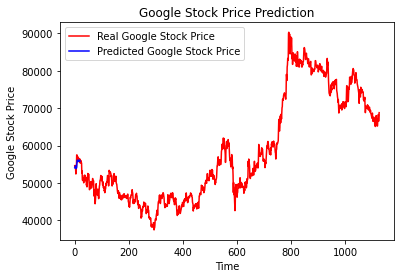

In [20]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()